In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pickle



In [53]:
dataset = pd.read_excel(r"C:\Users\toralesc\Documents\PROYECTO\datasets\K-Means\dataset_empleados_kmeans.xlsx")
dataset.head()

,Nombre,Ausencias Injustificadas,Llegadas tarde,Salidas tempranas,Rendimiento ACTUAL,Ciclo
0,Cecilia Torales,5,7,4,Bajo,202404
1,Cecilia Torales,5,5,5,Medio,202405
2,Cecilia Torales,3,7,7,Medio,202406
3,Cecilia Torales,4,6,5,Bajo,202407
4,Cecilia Torales,4,7,6,Medio,202408


In [54]:
#Codificar columna categorica
codificador = OneHotEncoder()
codificacion = codificador.fit_transform(dataset[["Rendimiento ACTUAL"]])

#generar nombres de las columnas nuevas y agregarlas al dataset original, y eliminar la columna categórica de este
nuevas_cols = pd.DataFrame(codificacion.toarray(), columns= codificador.get_feature_names_out(["Rendimiento ACTUAL"]) )
dataset = pd.concat([dataset, nuevas_cols], axis="columns")
dataset = dataset.drop("Rendimiento ACTUAL", axis=1)

In [55]:
columnas_numericas = dataset.columns.difference(["Nombre", "Ciclo"]).tolist() #todas las columnas exceptuando Nombre y Ciclo
#agrupo por nombre sumando todas las columnas numericas
dataset_agrupado_por_Nombre = dataset.groupby("Nombre")[columnas_numericas].sum().reset_index()
dataset_agrupado_por_Nombre.head()


,Nombre,Ausencias Injustificadas,Llegadas tarde,Rendimiento ACTUAL_Alto,Rendimiento ACTUAL_Bajo,Rendimiento ACTUAL_Medio,Salidas tempranas
0,Agustina Silva,11,21,5.0,4.0,4.0,20
1,Albert Einstein,3,3,12.0,0.0,1.0,0
2,Cecilia Torales,47,95,0.0,10.0,3.0,66
3,Elon Musk,11,27,3.0,6.0,4.0,22
4,Ezequiel Alfaro,55,92,0.0,4.0,9.0,67


In [56]:
#Escalo los valores numéricos
escalador = MinMaxScaler()
columnas_a_escalar = ["Ausencias Injustificadas", "Llegadas tarde", "Rendimiento ACTUAL_Alto", "Rendimiento ACTUAL_Bajo", "Rendimiento ACTUAL_Medio", "Salidas tempranas"]
dataset_agrupado_por_Nombre_escalado = dataset_agrupado_por_Nombre.copy()
dataset_agrupado_por_Nombre_escalado[columnas_a_escalar] = escalador.fit_transform(dataset_agrupado_por_Nombre_escalado[columnas_a_escalar])
dataset_agrupado_por_Nombre_escalado.head()

,Nombre,Ausencias Injustificadas,Llegadas tarde,Rendimiento ACTUAL_Alto,Rendimiento ACTUAL_Bajo,Rendimiento ACTUAL_Medio,Salidas tempranas
0,Agustina Silva,0.200000,0.221053,0.384615,0.4,0.444444,0.298507
1,Albert Einstein,0.054545,0.031579,0.923077,0.0,0.111111,0.000000
2,Cecilia Torales,0.854545,1.000000,0.000000,1.0,0.333333,0.985075
3,Elon Musk,0.200000,0.284211,0.230769,0.6,0.444444,0.328358
4,Ezequiel Alfaro,1.000000,0.968421,0.000000,0.4,1.000000,1.000000


In [57]:
#Aplicar k-means
n_clusters = 3
X = dataset_agrupado_por_Nombre_escalado.drop(['Nombre'], axis = 1)
kmeans = KMeans(n_clusters, random_state=12)  
dataset_agrupado_por_Nombre_escalado['Cluster'] = kmeans.fit_predict(X)  

#Agregar el cluster al dataset original agrupado (para que muestre los demás datos reales)
dataset_agrupado_por_Nombre["Cluster"] = dataset_agrupado_por_Nombre_escalado["Cluster"]

#Categorización de los clusters
dataset_agrupado_por_Nombre["Probabilidad de Rotación"] = dataset_agrupado_por_Nombre["Cluster"].map({
    2: "ALTA",
    0: "BAJA",
    1: "MEDIA"
})

dataset_agrupado_por_Nombre.head() #Solo para visualizar

,Nombre,Ausencias Injustificadas,Llegadas tarde,Rendimiento ACTUAL_Alto,Rendimiento ACTUAL_Bajo,Rendimiento ACTUAL_Medio,Salidas tempranas,Cluster,Probabilidad de Rotación
0,Agustina Silva,11,21,5.0,4.0,4.0,20,2,ALTA
1,Albert Einstein,3,3,12.0,0.0,1.0,0,0,BAJA
2,Cecilia Torales,47,95,0.0,10.0,3.0,66,1,MEDIA
3,Elon Musk,11,27,3.0,6.0,4.0,22,2,ALTA
4,Ezequiel Alfaro,55,92,0.0,4.0,9.0,67,1,MEDIA


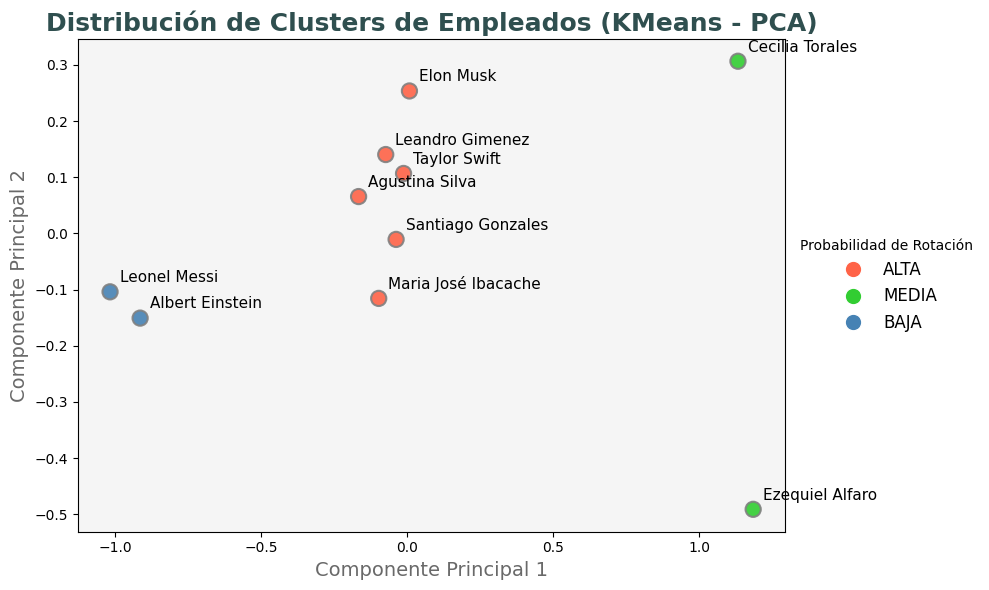

In [58]:

# GRAFICAR con PCA (Reducción de Dimensionalidad)
pca = PCA(n_components=2)
pca_resultado = pca.fit_transform(dataset_agrupado_por_Nombre_escalado[columnas_a_escalar])  # Usar las columnas escaladas

# Crear DataFrame con las 2 primeras componentes principales
df_pca = pd.DataFrame(pca_resultado, columns=['PC1', 'PC2'])
df_pca['Nombre'] = dataset_agrupado_por_Nombre['Nombre']  # Asegúrate de tener la columna 'Nombre'
df_pca['Probabilidad de Rotación'] = dataset_agrupado_por_Nombre['Probabilidad de Rotación']

# Asignar colores según 'Probabilidad de Rotación'
colores = {'ALTA': '#FF6347', 'MEDIA': '#32CD32', 'BAJA': '#4682B4'}
df_pca['Color'] = df_pca['Probabilidad de Rotación'].map(colores)

# Crear gráfico
plt.figure(figsize=(10, 6))

# Graficar los puntos
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Color'], s=120, alpha=0.9, edgecolors='grey', linewidth=1.5)

# Agregar nombres de cada punto
for i, nombre in enumerate(df_pca['Nombre']):
    plt.annotate(nombre, (df_pca['PC1'][i], df_pca['PC2'][i]), textcoords="offset points", xytext=(7, 7), ha='left', fontsize=11, fontweight='light', color='black')

# Títulos y etiquetas
plt.title("Distribución de Clusters de Empleados (KMeans - PCA)", fontsize=18, fontweight='bold', color='darkslategray')
plt.xlabel("Componente Principal 1", fontsize=14, color='dimgray')
plt.ylabel("Componente Principal 2", fontsize=14, color='dimgray')

# Leyenda
leyenda = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=12, linestyle='') for label, color in colores.items()]
plt.legend(handles=leyenda, title='Probabilidad de Rotación', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=False)

# Fondo y disposición
plt.gca().set_facecolor('whitesmoke')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


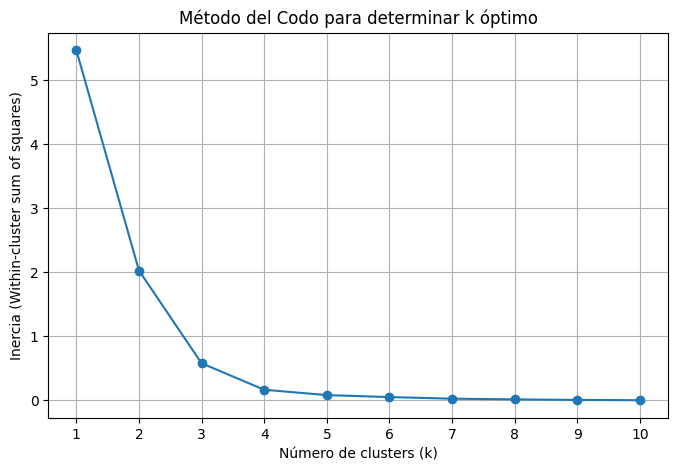

In [59]:
#Solo para chequear que el k no sea tan flashero
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Supongamos que tus datos están en X
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Gráfico del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (Within-cluster sum of squares)')
plt.title('Método del Codo para determinar k óptimo')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [60]:
#EXPORTAR
#Para exportar el archivo de Jupyter a Python
!jupyter nbconvert --to script K-Means-Rotación.ipynb
#Exportar en Excel los resultados
dataset_agrupado_por_Nombre.to_excel('resultado_clusters.xlsx', index=False, engine='openpyxl')
# Guardar el modelo KMeans entrenado
with open('modelo K-Means.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


[NbConvertApp] Converting notebook K-Means-Rotación.ipynb to script
[NbConvertApp] Writing 5472 bytes to K-Means-Rotación.py
